In [1]:
import ROOT
from ROOT import larlite
from ROOT import TFile, TDirectory, TGraph
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as smp
import root_numpy as rn
import pandas as pd
from scipy.optimize import curve_fit, minimize
import math
%matplotlib inline
import glob
from os.path import isfile, join

In [2]:
def loadE():
    mypath='/Users/ah673/WorkArea/Root6LArLite/UserDev/FindNeutrinos/CalcEfficiency/mac/GenieFiles'
    arg_e = [100, 150, 200, 250, 300, 400, 600, 800, 1000, 1500, 2000, 2500, 3000, 4000, 5000, 10000, 30000]
    car_e = [150, 200, 250, 300, 400, 600, 800, 1000, 1500, 2000]
    
    car_files = []
    arg_files = []
    for e in arg_e:
        f = 'gntpc_numu_carbon_%dMeV_CCincl.root'%e
        if isfile(join(mypath, f)):
            car_files.append(f)
    
    for e in car_e:
        f = 'gntpc_numu_argon_%dMeV_CCincl.root'%e
        if isfile(join(mypath, f)):
            arg_files.append(f)
    
    return (car_files,arg_files)

In [3]:
car_files, arg_files = loadE()

In [37]:
arg_f = '/Users/ah673/WorkArea/Root6LArLite/UserDev/FindNeutrinos/CalcEfficiency/mac/GenieFiles/gxsec_numu_argon.root'
arg_xsec = TFile("GenieFiles/gxsec_numu_argon.root","READ")
#arg_xsec = TFile.Open("GenieFiles/gxsec_numu_argon.root")
#print "ARG STUF: ", arg_xsec.list_directories()

arg_xsec.cd('nu_mu_40')
#print rn.list_directories(arg_f)
#arg_xsec.cd('nu_mu_Ar40')
#print TDirectory(arg_xsec.Get("nu_mu_Ar40"))
#arg_cc = arg_xsec.Get("tot_cc")
#print arg_cc

#gr = ROOT.TGraph(arg_xsec.Get("tot_cc"))
#print "ARG: ", ar_f.GetX()[0]
#plt.plot(ar_f.GetX(),ar_f.GetY())

#arg_gr = arg_xsec.Get("tot_cc")

#print ar_f


car_xsec = TFile("GenieFiles/gxsec_numu_carbon.root","READ")

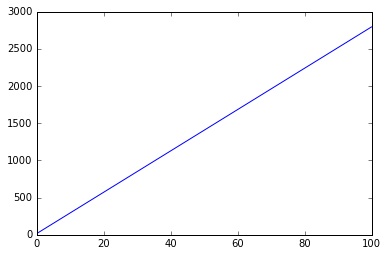

In [41]:
b = 16.2669  
m = 27.7789

x = np.linspace(0,100,17)
y = [ m*x[i] + b for i in xrange(len(x))]
plt.plot(x,y)

In [40]:
for k in xrange(len(arg_files)):

    mypath='/Users/ah673/WorkArea/Root6LArLite/UserDev/FindNeutrinos/CalcEfficiency/mac/GenieFiles/'
    f = mypath + arg_files[k] 
    #filename = TFile(f,"READ");
    temp_f = rn.root2array(f, treename='gst',
                    branches=['iev','neu','fspl','tgt','Z','A','hitnuc',\
                              'hitqrk','resid','sea','qel','mec','res','dis',\
                              'coh','dfr','imd','imdanh','singlek','nuel',\
                              'em','cc','nc','charm','neut_code','nuance_code',\
                              'wght','xs','ys','ts','Q2s','W','EvRF','Ev','pxv',\
                              'pyv','pzv','En','pxn','pyn','pzn','El','pxl','pyl',\
                              'pzl','pl','cthl','nfp','nfn','nfpip','nfpim','nfpi0',\
                              'nfkp','nfkm','nfk0','nfem','nfother','nip','nin','nipip',\
                              'nipim','nipi0','nikp','nikm','nik0','niem','niother','ni',\
                              'pdgi','resc','Ei','pxi','pyi','pzi','nf','pdgf','Ef','pxf',\
                              'pyf','pzf','pf','cthf','vtxx','vtxy','vtxz','vtxt','sumKEf',\
                              'calresp0'])   

    npi0, npi, nk, nk0 = 0, 0, 0, 0
    nev = temp_f.shape[0]
    arg_xsec, car_xsec = [], []
    for i in xrange(nev):
        n_sig = 0
        npart = temp_f[i]['nf']
        for j in xrange(int(npart)):
            pdgf = temp_f[i]['pdgf']
            
            if pdgf[j] == 111: npi0+=1
            elif pdgf[j] == 11 or pdgf[j] == 22 :  nlep+=1
            elif pdgf[j] == 211 or pdgf[j] == -211 : npi+=1
            elif pdgf[j] == 321 or pdgf[j] == -321: nk+=1
            elif pdgf[j] == 130 or pdgf[j] == 310 or pdgf[j] == 311 or pdgf[j] == -311: nk0+=1
            
            if(npi0 == 1 and npi == 0 and nk == 0 and nk0 == 0 and nlep == 0): n_sig+=1

    
        arg_xsec.append( float(n_sig) / nev * Ar_sigma[k])
    #print temp_f.shape

for k in xrange(len(car_files)):
    
    mypath='/Users/ah673/WorkArea/Root6LArLite/UserDev/FindNeutrinos/CalcEfficiency/mac/GenieFiles/'
    f = mypath + car_files[k] 
    
    temp_f = rn.root2array(f, treename='gst',
                            branches=['iev','neu','fspl','tgt','Z','A','hitnuc',\
                              'hitqrk','resid','sea','qel','mec','res','dis',\
                              'coh','dfr','imd','imdanh','singlek','nuel',\
                              'em','cc','nc','charm','neut_code','nuance_code',\
                              'wght','xs','ys','ts','Q2s','W','EvRF','Ev','pxv',\
                              'pyv','pzv','En','pxn','pyn','pzn','El','pxl','pyl',\
                              'pzl','pl','cthl','nfp','nfn','nfpip','nfpim','nfpi0',\
                              'nfkp','nfkm','nfk0','nfem','nfother','nip','nin','nipip',\
                              'nipim','nipi0','nikp','nikm','nik0','niem','niother','ni',\
                              'pdgi','resc','Ei','pxi','pyi','pzi','nf','pdgf','Ef','pxf',\
                              'pyf','pzf','pf','cthf','vtxx','vtxy','vtxz','vtxt','sumKEf',\
                              'calresp0'])
    
    npi0, npi, nk, nk0 = 0, 0, 0, 0
    nev = temp_f.shape[0]
    xsec = []
    for i in xrange(nev):
        n_sig = 0
        npart = temp_f[i]['nf']
        for j in xrange(int(npart)):
            pdgf = temp_f[i]['pdgf']
            
            if pdgf[j] == 111: npi0+=1
            elif pdgf[j] == 11 or pdgf[j] == 22 :  nlep+=1
            elif pdgf[j] == 211 or pdgf[j] == -211 : npi+=1
            elif pdgf[j] == 321 or pdgf[j] == -321: nk+=1
            elif pdgf[j] == 130 or pdgf[j] == 310 or pdgf[j] == 311 or pdgf[j] == -311: nk0+=1
            
        if(npi0 == 1 and npi == 0 and nk == 0 and nk0 == 0 and nlep == 0): n_sig+=1
    
        car_xsec.append( float(n_sig) / nev * Ar_sigma[k])

    #print temp_f.shape

NameError: name 'Ar_sigma' is not defined

In [18]:
FILENAME = "gamma_mergeall_gaus.root" #TFile("ana.root","READ")
FILENAME = "gamma_e_compare.root" #TFile("ana.root","READ")

gamma_v = rn.root2array(FILENAME,
                    treename='tree',
                    branches=['hit_reco_e','reco_e','mc_e','sum','sum_adj','sum_reco_int'])


true_e = [gamma_v[i][2] for i in xrange(gamma_v.shape[0])]
reco_e = [gamma_v[i][1] for i in xrange(gamma_v.shape[0])]
sum_v = [gamma_v[i][3] for i in xrange(gamma_v.shape[0])]
sum_adj_v = [gamma_v[i][4] for i in xrange(gamma_v.shape[0])]
sum_reco_int = [gamma_v[i][5] for i in xrange(gamma_v.shape[0])]


In [ ]:

    tree = dynamic_cast <TTree *>(file.Get("gst"));
      if(!tree) return 1;

      tree -> SetBranchAddress("nf", &nf);
      tree -> SetBranchAddress("pdgf", pdgf);
      tree -> SetBranchAddress("Ef", Ef);

      int nev = tree -> GetEntries();

      double n_ccincl = 0;
      double n_0pi = 0;

      int npi = 0;
      int npi0 = 0;
      int np = 0;
      int nk = 0;
      int nk0 = 0;
      int ngamma = 0;
      int nn = 0;
      int npseudo = 0;
      int nlambda0 = 0;
      int nsigma0 = 0;
      int nsigma = 0;
      int nantip = 0;
      int nexclude = 0;

      for(int i = 0; i < nev; i++) {

         tree->GetEntry(i);

         npi = 0;
         npi0 = 0;
         np = 0;
         nk = 0;
         nk0 = 0;
                     ngamma = 0;
         nn = 0;
         nlambda0 = 0;
         nsigma0 = 0;
         nsigma = 0;
         nantip = 0;
         nexclude = -1;
         nelec = 0;

         for(int j = 0; j < nf; j++) {
            if(pdgf[j] == 111 && Ef[j] > Ar_Ethresh_pi0) npi0++;
            else if(pdgf[j] == 11 )  nelec++;
            else if((pdgf[j] == 211 || pdgf[j] == -211) && Ef[j] > Ar_Ethresh_pi) npi++;
            else if(pdgf[j] == 2212 && Ef[j] > Ar_Ethresh_p) np++;
            else if((pdgf[j] == 321 || pdgf[j] == -321) && Ef[k] > Ar_Ethresh_K) nk++;
            else if((pdgf[j] == 130 || pdgf[j] == 310 || pdgf[j] == 311 || pdgf[j] == -311) && Ef[j] > Ar_Ethresh_K0) nk0++;
            else if(pdgf[j] == 22) ngamma++;
            else if(pdgf[j] == 2112 || pdgf[j] == -2112) nn++;
            else if((pdgf[j] == 3122 || pdgf[j] == -3122) && Ef[j] > Ar_Ethresh_Lambda0) nlambda0++;
            else if(pdgf[j] == 3212 && Ef[j] > Ar_Ethresh_Sigma0) nsigma0++;
            else if((pdgf[j] == 3222 || pdgf[j] == 3112) && Ef[j] > Ar_Ethresh_Sigma) nsigma++;
            else if(pdgf[j] == -2212 && Ef[j] > Ar_Ethresh_antip) nantip++;
         }// end loop over particles    

         n_ccincl++;
         if(npi0 == 1 && npi == 0 && nk == 0 && nk0 == 0 && ngamma == 0 && nelec == 0) n_0pi++;

      }//end loop over events

      file.Close();

      Ar_N_ccincl[k] = n_ccincl / nev / nargon * Ar_sigma[k];
      Ar_N_0pi[k] = n_0pi / nev / nargon * Ar_sigma[k];
   }



In [ ]:
   for(int k = 0; k < C_n; k++) {

      double wght = 0;

      cout << "... " << k << endl;

      int energy = C_E[k];
      TTree *tree = 0;
      sprintf(filename, "/Users/ah673/WorkArea/Root6LArLite/UserDev/FindNeutrinos/CalcEfficiency/mac/GenieFiles/gntpc_numu_carbon_%dMeV_CCincl.root", energy);
      TFile file(filename,"READ");

      tree = dynamic_cast <TTree *>(file.Get("gst"));
      if(!tree) return 1;

      tree -> SetBranchAddress("nf", &nf);
      tree -> SetBranchAddress("pdgf", pdgf);
      tree -> SetBranchAddress("Ef", Ef);

      int nev = tree -> GetEntries();

      double n_ccincl = 0;
      double n_0p = 0;
      double n_1p = 0;
      double n_2p = 0;
      double n_0pi = 0;

      int npi = 0;
      int npi0 = 0;
      int np = 0;
      int nk = 0;
      int nk0 = 0;
      int ngamma = 0;
      int nn = 0;
      int npseudo = 0;
      int nlambda0 = 0;
      int nsigma0 = 0;
      int nsigma = 0;
      int nantip = 0;
      int nexclude = 0;

      for(int i = 0; i < nev; i++) {

         tree->GetEntry(i);

         npi = 0;
         npi0 = 0;
         np = 0;
         nk = 0;
         nk0 = 0;
                    ngamma = 0;
         nelec = 0;
         nn = 0;
         nlambda0 = 0;
         nsigma0 = 0;
         nsigma = 0;
         nantip = 0;
         nexclude = -1;

         for(int j = 0; j < nf; j++) {
            if(pdgf[j] == 111 && Ef[j] > C_Ethresh_pi0) npi0++;
            else if(abs(pdgf[j]) == 11 ) nelec++;
            else if((pdgf[j] == 211 || pdgf[j] == -211) && Ef[j] > C_Ethresh_pi) npi++;
            else if(pdgf[j] == 2212 && Ef[j] > C_Ethresh_p) np++;
            else if((pdgf[j] == 321 || pdgf[j] == -321) && Ef[k] > C_Ethresh_K) nk++;
            else if((pdgf[j] == 130 || pdgf[j] == 310 || pdgf[j] == 311 || pdgf[j] == -311) && Ef[j] > C_Ethresh_K0) nk0++;
            else if(pdgf[j] == 22) ngamma++;
            else if(pdgf[j] == 2112 || pdgf[j] == -2112) nn++;
            else if((pdgf[j] == 3122 || pdgf[j] == -3122) && Ef[j] > C_Ethresh_Lambda0) nlambda0++;
            else if(pdgf[j] == 3212 && Ef[j] > C_Ethresh_Sigma0) nsigma0++;
            else if((pdgf[j] == 3222 || pdgf[j] == 3112) && Ef[j] > C_Ethresh_Sigma) nsigma++;
            else if(pdgf[j] == -2212 && Ef[j] > C_Ethresh_antip) nantip++;
         }// end loop over particles    

         nexclude = npi + npi0 + nk + nk0 + ngamma + nlambda0 + nsigma + nsigma0 + nantip;
         n_ccincl++;
         //if(npi0 == 1) n_0pi++;
         if(npi0 == 1 && npi == 0 && nk == 0 && nk0 == 0 && ngamma == 0 && nelec == 0) n_0pi++;

      }//end loop over events

      file.Close();

      C_N_ccincl[k] = n_ccincl / nev / ncarbon * C_sigma[k];
      C_N_0pi[k] = n_0pi / nev / ncarbon * C_sigma[k];
   }


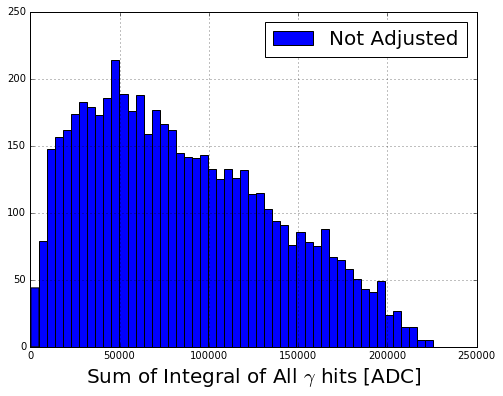

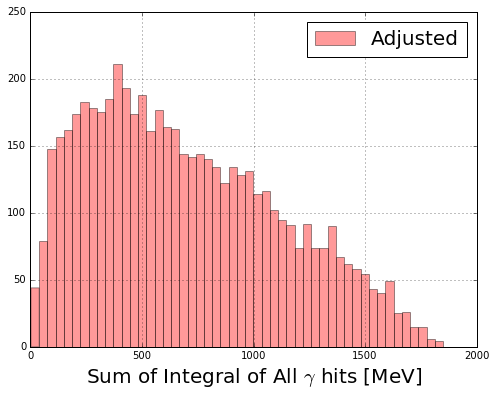

In [19]:
plt.figure(figsize=(8,6))
plt.hist(sum_v,bins=50,label="Not Adjusted") #, norm=LogNorm())
#plt.plot(x,x,'r-',label='y = x',lw=4)
plt.grid(True)
plt.xlabel("Sum of Integral of All $\gamma$ hits [ADC]",fontsize=20)
plt.legend(loc=0,fontsize=20)

In [20]:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))
